In [1]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [2]:
df = pd.read_csv('gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df['Date'] = pd.to_datetime(df['Date']) #to convert Date column from string to datatime 

In [5]:
df.head() 

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


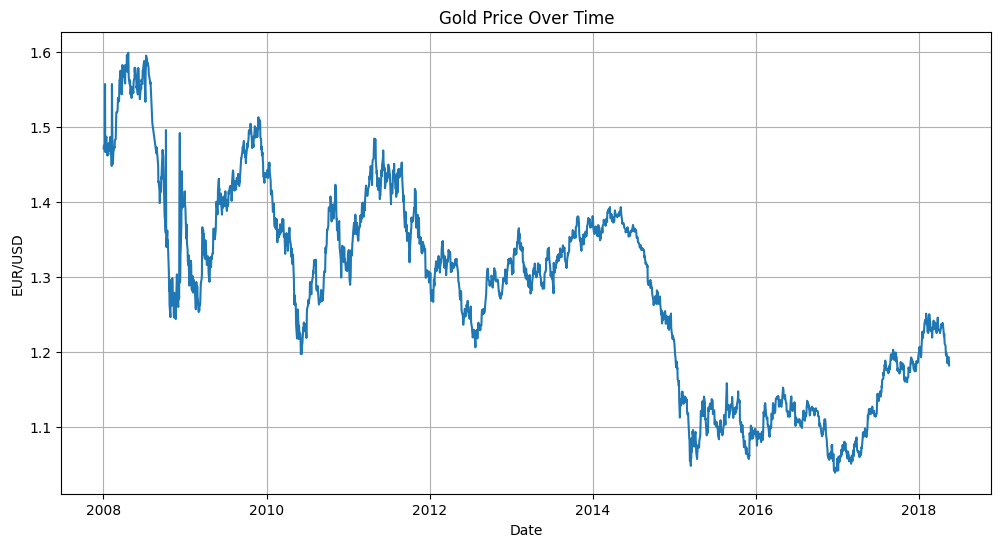

In [6]:
# Line Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='EUR/USD', data=df)
plt.xlabel('Date')
plt.ylabel('EUR/USD')
plt.title('Gold Price Over Time')
plt.grid(True)
plt.show()

In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
df.isnull().sum() # it will give me the number null values in each column 

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<Axes: >

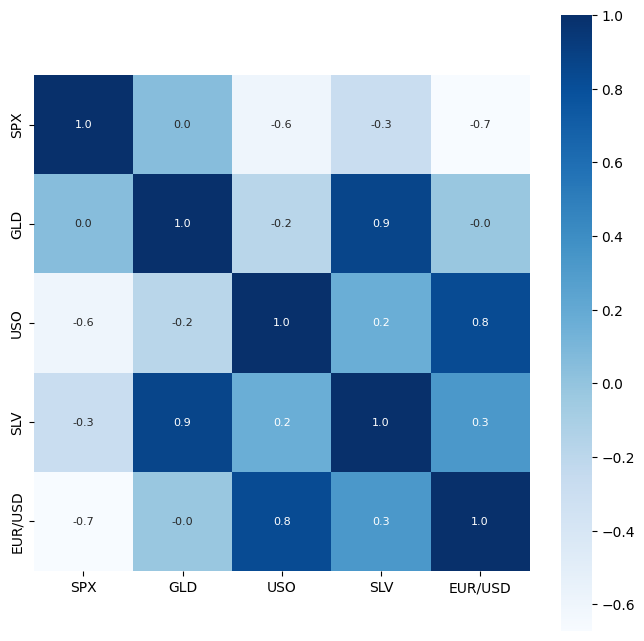

In [9]:
# get the correlation among all features

correlation = df.corr(numeric_only = True)
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True,square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [10]:
# drop the Date column 
X = df.drop(['Date','EUR/USD'],axis = 1)
y = df['EUR/USD']
X.head()

,SPX,GLD,USO,SLV
0,1447.160034,84.860001,78.470001,15.180
1,1447.160034,85.570000,78.370003,15.285
2,1411.630005,85.129997,77.309998,15.167
3,1416.180054,84.769997,75.500000,15.053
4,1390.189941,86.779999,76.059998,15.590


In [11]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.shape

(1832,)

In [12]:
# Create the Random Forest Regression model and fit the traing data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

In [13]:
y_test = list(y_test)

In [17]:
error = metrics.r2_score(y_test, predictions)
print("R squared error : ", error)

R squared error :  0.9820257887793726


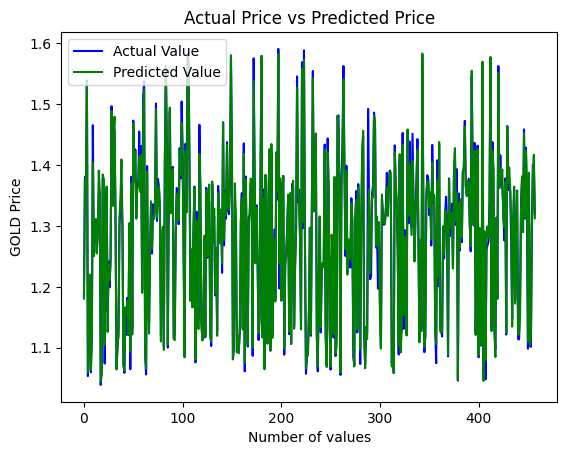

In [18]:
plt.plot(y_test, c = 'b', label = 'Actual Value')
plt.plot(predictions, c ='g' , label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()